In [1]:
import numpy as np
import imageio.v3 as iio
import imageio.v3 as iio1
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import pdist
from sklearn.metrics import auc, roc_curve
import glob
import os
import math
import torch
import time

In [ ]:
masks_path = ""  # Update with the correct path
images_path = ""

In [3]:
# Get all .jpg file paths in the directory
image_files = glob.glob(os.path.join(images_path, "*.jpg"))

# Dictionary to store normalized images and RGB images
images_dict_norm = {}
images_dict_RGB = {}

# Loop through each image file and process it
for file in image_files:
    imageRGBT = iio.imread(file)
    imageRGBT = imageRGBT[:, :, :3]  # Ensure it's in RGB format

    # Normalize the image
    dT = imageRGBT.shape[-1]
    muT = np.mean(imageRGBT.reshape(-1, dT), axis=0)
    imageT = imageRGBT / muT

    # Get the filename key
    filename_key = os.path.basename(file)

    # Store the normalized image and original RGB image 
    images_dict_norm[filename_key] = imageT
    images_dict_RGB[filename_key] = imageRGBT 

# Print information
print("Loaded", len(images_dict_norm), "images from:", images_path)
print("Shape of the first image:", list(images_dict_norm.values())[0].shape if images_dict_norm else "No images found")

Loaded 13 images from: C:/Users/User/Documents/AYBU/2.1/Thesis/_RX_detector/data/images_256/
Shape of the first image: (256, 256, 3)


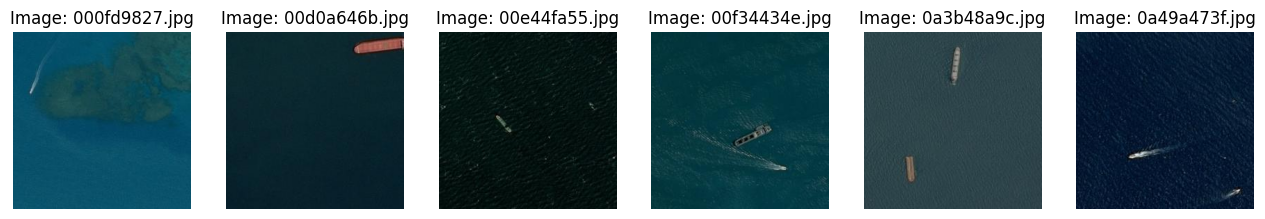

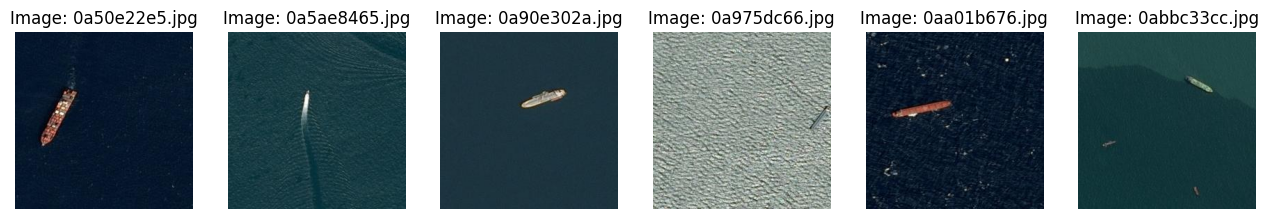

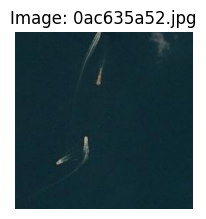

In [4]:
# Assuming images_dict_RGB contains images with keys and values in RGB format (each image as a NumPy array)
images_per_row = 6

# Calculate the number of rows required for the images
n_images = len(images_dict_RGB)
n_rows = math.ceil(n_images / images_per_row)

# Create a figure to display images with dynamic number of rows
for row in range(n_rows):
    # Create a new figure for each row (or a new subplot grid)
    plt.figure(figsize=(16, 4))  # Adjust figsize to fit all images

    # Loop through the images for the current row
    for col in range(images_per_row):
        idx = row * images_per_row + col
        if idx >= n_images:  # Stop if there are no more images
            break

        filename_key, imageRGB = list(images_dict_RGB.items())[idx]

        # Display the image (RGB)
        plt.subplot(1, images_per_row, col + 1)  # Create subplot for this image
        plt.imshow(imageRGB)
        plt.axis('off')  # Hide axes

        # Set the title
        plt.title(f'Image: {filename_key}')

    # Show images for the current row
    plt.show()

In [5]:
# Get all .pt file paths in the directory
pt_files = glob.glob(os.path.join(masks_path, "*.pt"))

# Dictionary to store binary masks
groundtruth_dict = {}

# Loop through each .pt file and process it
for file in pt_files:
    # # Load the .pt file
    mask_tensor = torch.load(file)  # Expected shape: [1, H, W], dtype=float32
    
    # Convert to binary mask (thresholding)
    binary_mask = (mask_tensor > 0).squeeze(0).cpu().numpy().astype(np.uint8)  # Shape: [H, W]

    # # Convert to RGB format (H, W, 3) if needed
    # binary_mask_rgb = np.stack([binary_mask] * 3, axis=-1)  # Shape: [H, W, 3]

    # Extract the key from the filename (before '_mask')
    filename_key = os.path.basename(file).replace("_mask.pt", "")

    # Store in the dictionary
    groundtruth_dict[filename_key] = binary_mask

# Print information
print("Loaded", len(groundtruth_dict), "masks from:", masks_path)
print("Shape of the first mask:", list(groundtruth_dict.values())[0].shape if groundtruth_dict else "No masks found")

C:\Users\User\AppData\Local\Temp\ipykernel_3616\4167928579.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mask_tensor = torch.load(file)  # Expected shape: [1, H, W], 

Loaded 13 masks from: C:/Users/User/Documents/AYBU/2.1/Thesis/_RX_detector/data/masks_256/
Shape of the first mask: (256, 256)


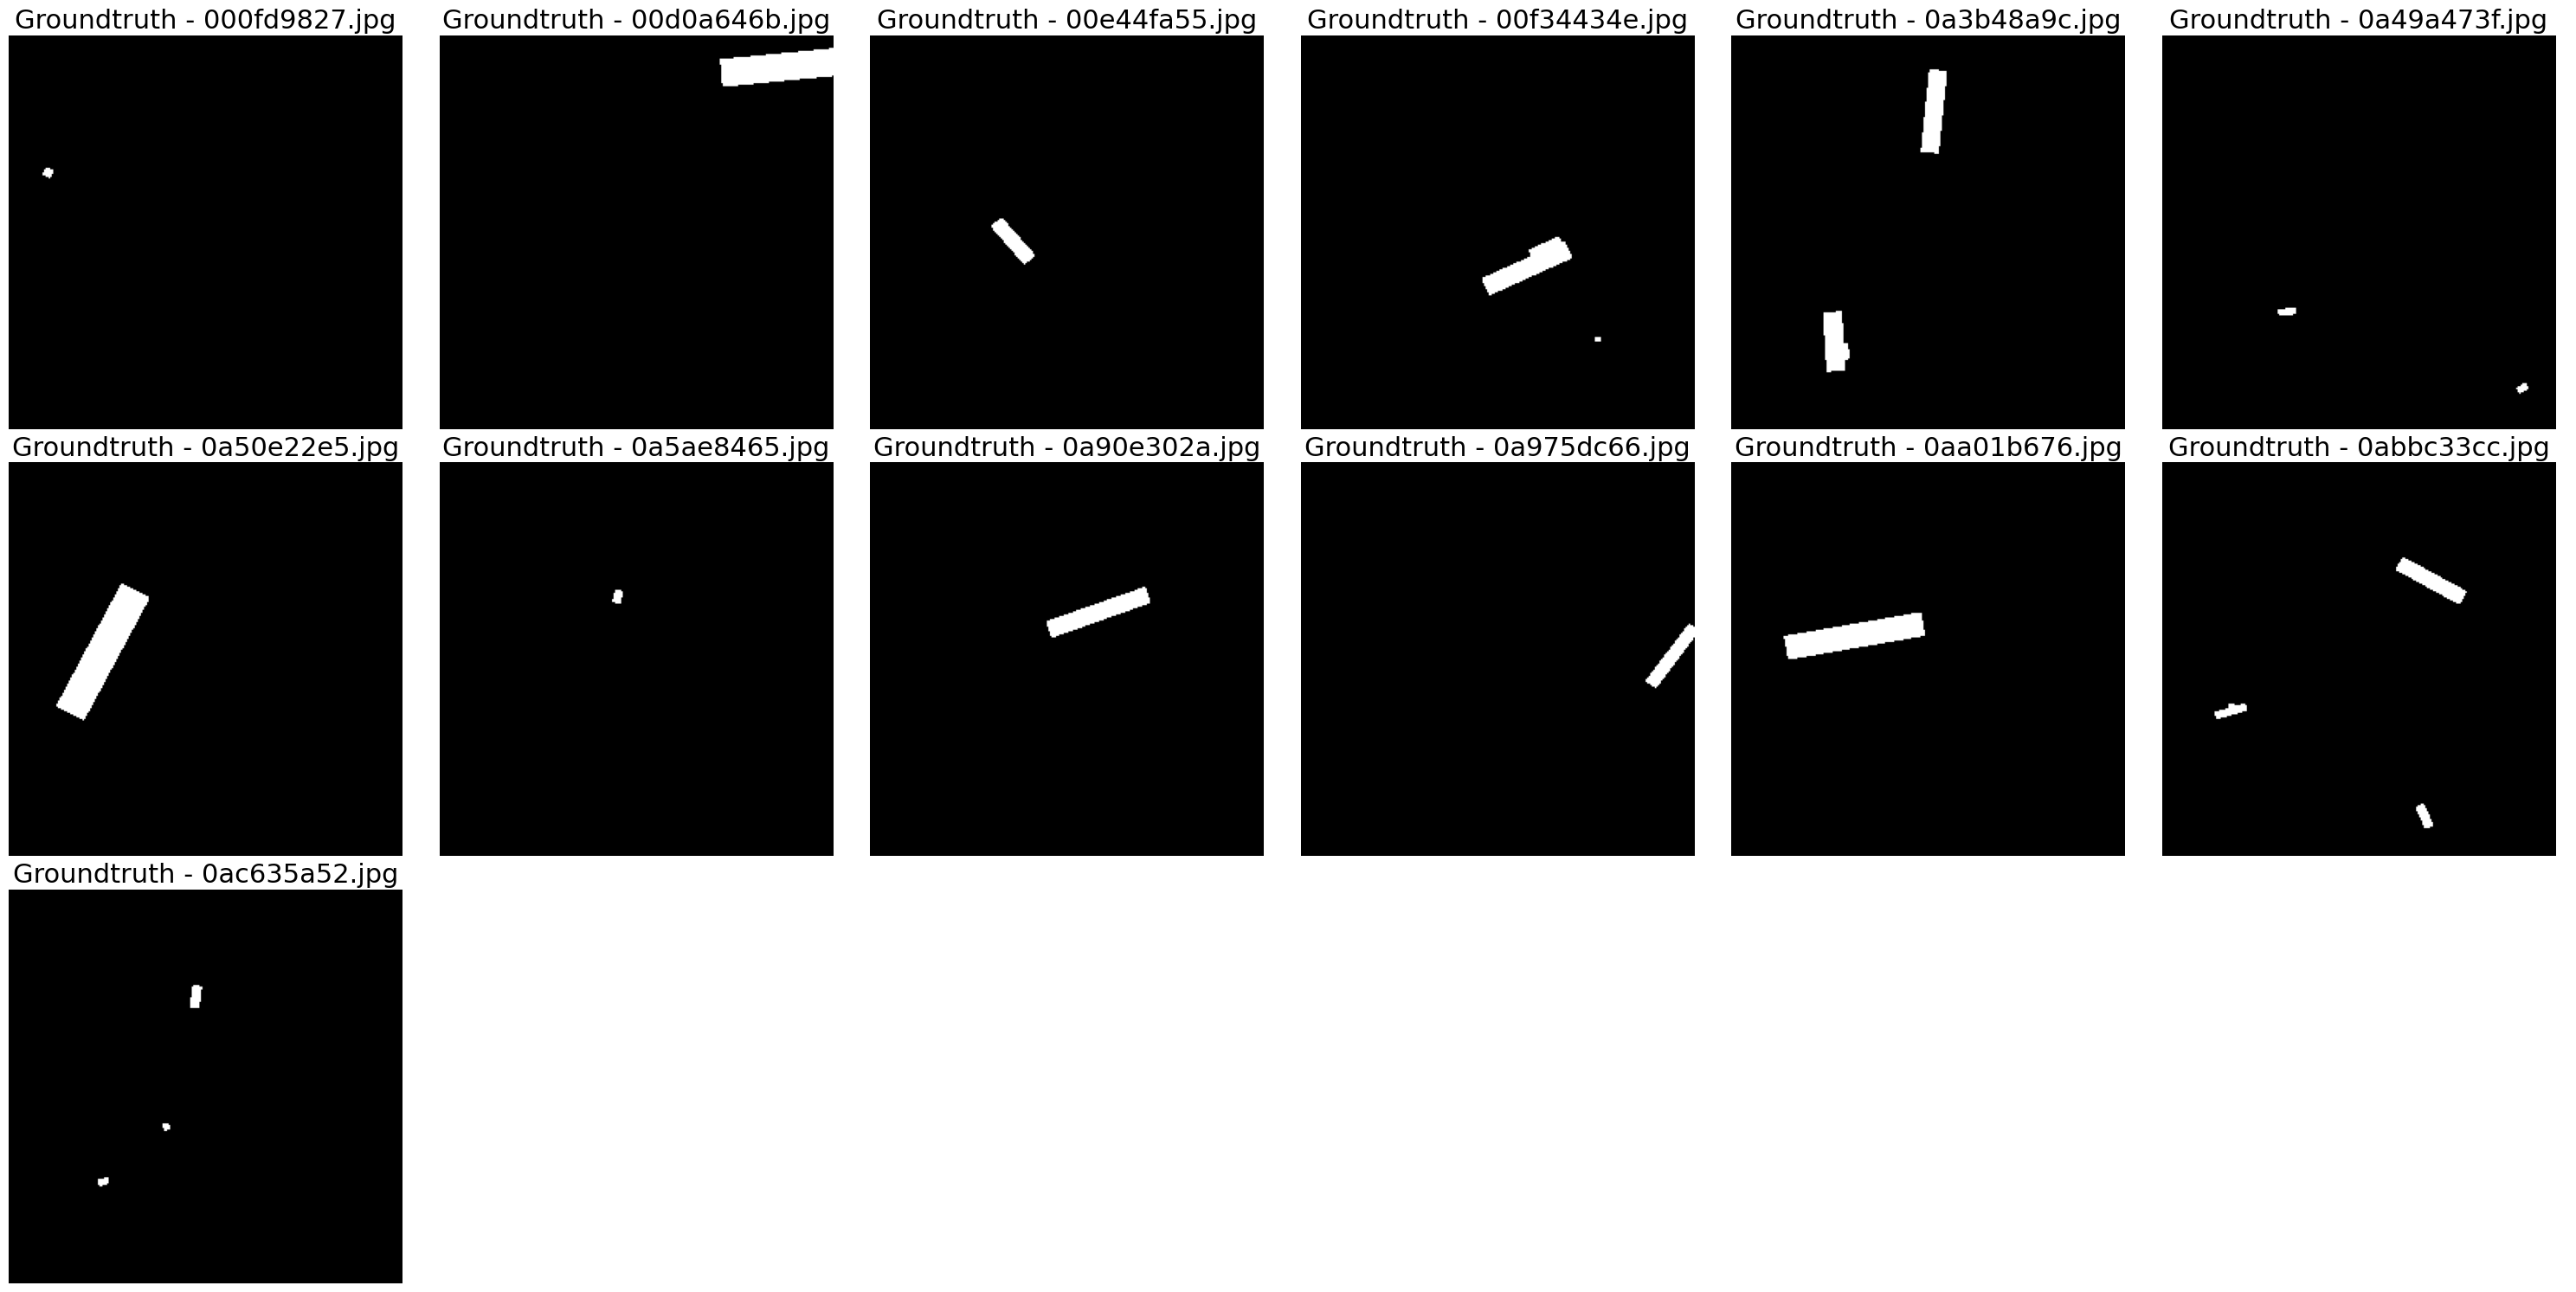

In [6]:
# Define the number of images
num_images = len(groundtruth_dict)

# Define the number of images per row (4 per row)
images_per_row = 6

# Calculate the number of rows required for the images
n_rows = math.ceil(num_images / images_per_row)

# Create a figure with subplots arranged in multiple rows and 4 images per row
fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row * 5, n_rows * 5))

# Flatten axes in case of multi-row arrangement
axes = axes.flatten()

# Iterate over the binary masks and plot them
for idx, (filename_key, mask) in enumerate(groundtruth_dict.items()):
    ax = axes[idx]
    ax.imshow(mask, cmap='gray')
    ax.axis('off')  # Hide axes
    
    ax.set_title(f'Groundtruth - {filename_key}', fontsize=22)

# Hide any remaining empty subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap and show the images
plt.tight_layout()
plt.show()

In [7]:
imageRGBD = iio1.imread('ships.png')
imageRGBD = imageRGBD[:, :, :3]
print('image.shape = ', imageRGBD.shape)

d = imageRGBD.shape[-1]
mu = np.mean(imageRGBD.reshape(-1, d), axis=0)
image = imageRGBD / mu

image.shape =  (269, 480, 3)


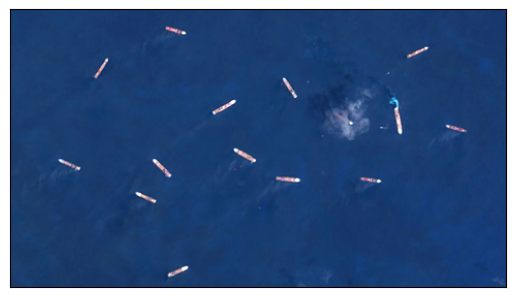

In [8]:
fig = plt.imshow(imageRGBD)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In [9]:
groundtruthD = iio1.imread('ships_groundtruth.png')
groundtruthD = groundtruthD > 0
groundtruthD = groundtruthD.astype(float)
groundtruthD = 1.0 - groundtruthD


print('groundtruth.shape = ', groundtruthD.shape)

groundtruth.shape =  (269, 480, 3)


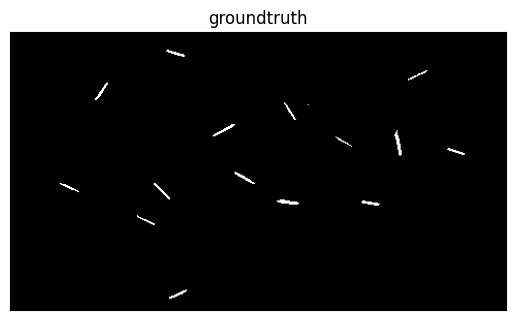

In [10]:
fig = plt.imshow(groundtruthD, cmap='gray')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title('groundtruth')
plt.show()

## FUNCTIONS

In [11]:
def estimateSigma(X, sample_size=5000):
    n_samples = X.shape[0]

    if n_samples * (n_samples - 1) / 2 <= sample_size:
        pairwise_distances = pdist(X, metric='euclidean')
    else:
        idx1 = np.random.choice(n_samples, size=sample_size)
        idx2 = np.random.choice(n_samples, size=sample_size)
        diff = X[idx1] - X[idx2]
        pairwise_distances = np.sqrt(np.sum(diff ** 2, axis=1))

    sigma = max(np.sqrt((np.median(pairwise_distances) + np.mean(pairwise_distances)) / 2.0), 1e-3)

    return sigma

In [12]:
def createMappedImage(image, D, sigma=None):
    d = image.shape[-1]
    X = image.reshape(-1, d)
    
    if (sigma is None):
        sigma = estimateSigma(X)
    
    d = image.shape[-1]
    G = np.random.randn(D, D)
    Q, _ = np.linalg.qr(G)
    S = np.diag(np.sqrt(np.random.chisquare(1, size=D)))
    W = np.dot(S, Q)[:, :d] / sigma

    Z = X @ W.T
    mappedImage = Z.reshape(image.shape[0], image.shape[1], -1)
    
    return mappedImage

In [13]:
class TiledAlgorithm:
    def __init__(self, tile_size, padding, border_type, band_size):
        self.tile_size = tile_size
        self.padding = padding
        self.border_type = border_type
        self.band_size = band_size 

    def process(self, source_image):
        # Get image dimensions
        height, width, channels = source_image.shape

        # Calculate number of rows and columns based on tile size
        rows = (height // self.tile_size) + (1 if height % self.tile_size else 0)
        cols = (width // self.tile_size) + (1 if width % self.tile_size else 0)

        tiles = []
        tile_centers = []
        tile_means = []
        tile_covariances = []
        result_image = np.zeros_like(source_image)

        for row_tile in range(rows):
            for col_tile in range(cols):
                # Compute tile start and end positions with band size
                x_start = max(col_tile * self.tile_size - self.band_size, 0)
                y_start = max(row_tile * self.tile_size - self.band_size, 0)
                x_end = min(x_start + self.tile_size + self.band_size, width)
                y_end = min(y_start + self.tile_size + self.band_size, height)

                # Extract the tile and force it to be of fixed size
                src_tile = np.zeros((self.tile_size + self.band_size, self.tile_size + self.band_size, channels), dtype=source_image.dtype)
                self.copySourceTile(source_image, src_tile, (x_start, y_start, x_end, y_end))

                # Compute the center of the tile
                tile_center_x = (x_start + x_end) // 2
                tile_center_y = (y_start + y_end) // 2
                tile_centers.append((tile_center_x, tile_center_y))

                # Reshape tile for mean and covariance calculation
                tile = source_image[y_start:y_end, x_start:x_end]
                tile_reshaped = tile.reshape(-1, channels)
                mu_tile = np.mean(tile_reshaped, axis=0)
                Xtrz = tile_reshaped - mu_tile
                tile_reshaped_area = Xtrz.shape[0]
                cov_tile = (1 / tile_reshaped_area) * np.dot(Xtrz.T, Xtrz) + np.eye(channels) * 1e-16  # Regularization
                
                # Store the computed values
                tile_means.append(mu_tile)
                tile_covariances.append(cov_tile)
                tiles.append(src_tile)
                
                # Copy tile to the result image with proper blending
                dst_tile = (col_tile * self.tile_size, row_tile * self.tile_size)
                self.copyTileToResultImage(src_tile, result_image, dst_tile)

        return tiles, tile_centers, tile_means, tile_covariances, result_image

    def copySourceTile(self, src, src_tile, tile):
        """
        Extract a tile from the source image considering padding and boundary constraints,
        ensuring all tiles are the same fixed size.
        """
        x_start, y_start, x_end, y_end = tile
        cropped_tile = src[y_start:y_end, x_start:x_end]
        
        # Pad the tile if it's smaller than the expected tile size + band size
        top_pad = max(0, (self.tile_size + self.band_size) - cropped_tile.shape[0])
        left_pad = max(0, (self.tile_size + self.band_size) - cropped_tile.shape[1])
        
        src_tile[:] = cv2.copyMakeBorder(cropped_tile, 0, top_pad, 0, left_pad, self.border_type)

    def copyTileToResultImage(self, tile_image, result_image, result_roi):
        """
        Copy the processed tile to the result image, ensuring smooth blending in overlapping regions.
        """
        x_start, y_start = result_roi
        x_end = min(x_start + self.tile_size, result_image.shape[1])
        y_end = min(y_start + self.tile_size, result_image.shape[0])

        tile_view = tile_image[:y_end - y_start, :x_end - x_start]
        
        # Blend overlapping regions instead of directly copying
        existing_view = result_image[y_start:y_end, x_start:x_end]
        alpha = 0.5  # Blend factor
        result_image[y_start:y_end, x_start:x_end] = cv2.addWeighted(existing_view, alpha, tile_view, 1 - alpha, 0)

In [14]:
def compute_weighted(means, covariances, tile_centers, image, alpha=0.1):

    height, width, _ = image.shape
    RX_scores = np.zeros((height, width))

    # Create a grid of pixel coordinates (height x width)
    x_indices, y_indices = np.meshgrid(np.arange(width), np.arange(height))  # x, y indices of pixels

    # Compute pixel-to-tile center distances for all tiles
    w_i = np.array([
        np.sqrt((y_indices - tile_center[1]) ** 2 + (x_indices - tile_center[0]) ** 2)
        for tile_center in tile_centers
    ])  # Shape (num_tiles, height, width)

    # Compute the weights for all pixels based on tile distances
    weights = np.exp(-alpha * w_i)  # Shape (num_tiles, height, width)
    
    # Normalize weights across all tiles for each pixel
    weights_sum = np.sum(weights, axis=0)  # Sum over tile axis, result shape (height, width)

    # Compute Mahalanobis distances for all pixels against all tiles
    for idx, (mean_vec, cov_inv) in enumerate(zip(means, covariances)):
        # Compute pixel-wise Mahalanobis distance for all pixels
        z_hat = image - mean_vec  # Shape (height, width, num_channels)
        d_i_hat = np.sum(z_hat @ cov_inv * z_hat, axis=-1)  # Compute Mahalanobis distance squared
        d_i = np.sqrt(d_i_hat)  # Take square root for final Mahalanobis distances

        RX_scores += (weights[idx] * d_i)  # Weighted sum of Mahalanobis distances

    # Normalize the final RX scores
    RX_scores /= weights_sum  # Normalize by total weight for each pixel

    return RX_scores

## MAIN CODE

In [15]:
tile_size = 45
band_size = tile_size // 2
tot_size = tile_size + band_size
D = 5
padding = 5
border_type = cv2.BORDER_CONSTANT 

airbus ship detection challenge dataset

In [16]:
results_dict = {}

# Iterate over the images in the dictionary
for img_idT, imageT in images_dict_norm.items():
    # Process each image
    mappedImageT = createMappedImage(imageT, D)

    n_channelsT = mappedImageT.shape[2]
    
    # Initialize the algorithm with the desired parameters
    algorithm = TiledAlgorithm(tile_size, padding, border_type, band_size)
    
    # Process the image to get tiles, tile centers, means, covariances, and result image
    tilesT, tile_centersT, tile_meansT, tile_covariancesT, result_imageT = algorithm.process(mappedImageT)
    
    # Store the result in the dictionary with the image ID
    results_dict[img_idT] = {
        'mapped_imageT': mappedImageT,
        'tilesT': tilesT,
        'tile_centersT': tile_centersT,
        'tile_meansT': tile_meansT,
        'tile_covariancesT': tile_covariancesT,
        'result_imageT': result_imageT,
    }


In [17]:
GL_times = []

for img_idT, imageT in images_dict_norm.items():

    starttimeGL =time.time()
    # Compute the weighted LRX scores for the image
    weighted_LRX_scoresT = compute_weighted(
        results_dict[img_idT]['tile_meansT'], 
        results_dict[img_idT]['tile_covariancesT'], 
        results_dict[img_idT]['tile_centersT'], 
        results_dict[img_idT]['mapped_imageT']  # Correct key name
    )
    total_timeGL = time.time() - starttimeGL
    GL_times.append(total_timeGL)
    
    # Store the weighted LRX scores in the results dictionary
    results_dict[img_idT]['weighted_LRX_scoresT'] = weighted_LRX_scoresT
    

    print("Done for", img_idT)
    

Done for 000fd9827.jpg
Done for 00d0a646b.jpg
Done for 00e44fa55.jpg
Done for 00f34434e.jpg
Done for 0a3b48a9c.jpg
Done for 0a49a473f.jpg
Done for 0a50e22e5.jpg
Done for 0a5ae8465.jpg
Done for 0a90e302a.jpg
Done for 0a975dc66.jpg
Done for 0aa01b676.jpg
Done for 0abbc33cc.jpg
Done for 0ac635a52.jpg


In [18]:
def showRXresultT(ax, RX_scores, title, percentileValue=99):
    threshold = np.percentile(RX_scores.flatten(), percentileValue) 
    ax.imshow(RX_scores >= threshold, cmap='gray')
    ax.set_title(title, fontsize=10)
    ax.axis('off')

In [19]:
def showRXscoresT(ax, RX_scores, title):
    ax.imshow(RX_scores, cmap='gray')
    ax.set_title(title, fontsize=10)
    ax.axis('off')

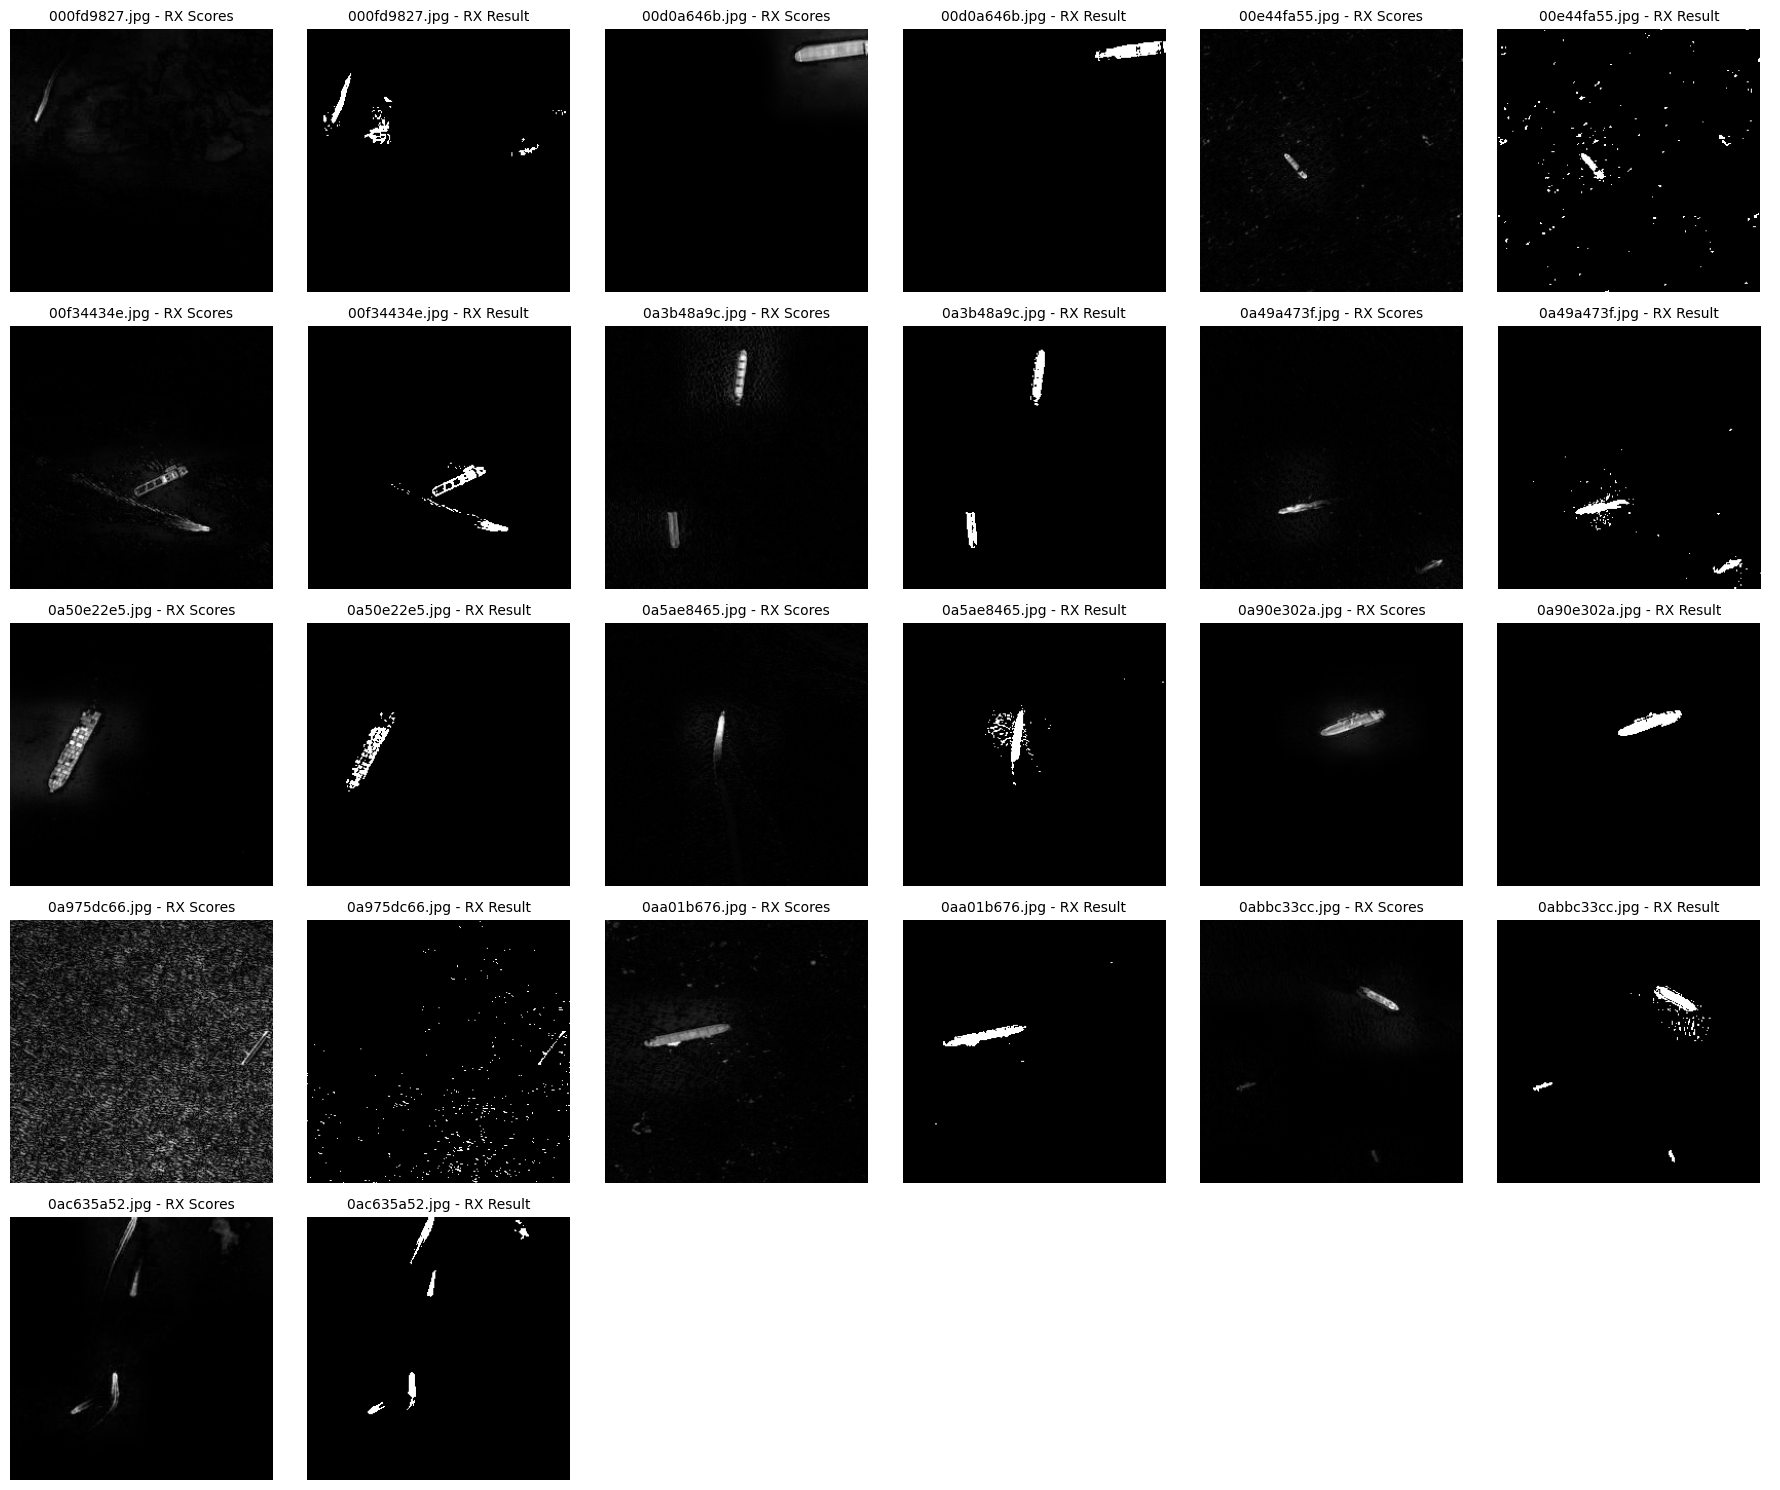

In [20]:
# Define how many columns we want in the figure
cols = 6  # 6 images per row
num_items = len(results_dict)
rows = (num_items * 2 + cols - 1) // cols  # Compute required rows

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

# Flatten the axes array for easier indexing
axes = axes.flatten()

idx = 0
for img_idT, resultT in results_dict.items():
    if idx >= len(axes) - 1:  # Prevent out of bounds
        break
    showRXscoresT(axes[idx], resultT['weighted_LRX_scoresT'], f"{img_idT} - RX Scores")
    idx += 1
    showRXresultT(axes[idx], resultT['weighted_LRX_scoresT'], f"{img_idT} - RX Result")
    idx += 1

# Hide any unused subplots
for i in range(idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [21]:
def draw_grid(image, tile_size, tot_size, dot_spacing = 3):  # Default: black grid lines
    imagecustom = np.copy(image)
    height, width, _ = imagecustom.shape

    for i in range(0, height, tile_size):
        imagecustom[i, :, 0] = 255  # Horizontal lines

    for i in range(0, width, tile_size):
        imagecustom[:, i, 0] = 255 # Vertical lines
    
    for i in range(0, height, tot_size):
        for j in range(0, width, dot_spacing):  # Add a dot pattern along the line
            imagecustom[i, j, 1] = 255  # Horizontal dotted lines

    for i in range(0, width, tot_size):
        for j in range(0, height, dot_spacing):  # Add a dot pattern along the line
            imagecustom[j, i, 1] = 255  # Vertical dotted lines

    return imagecustom

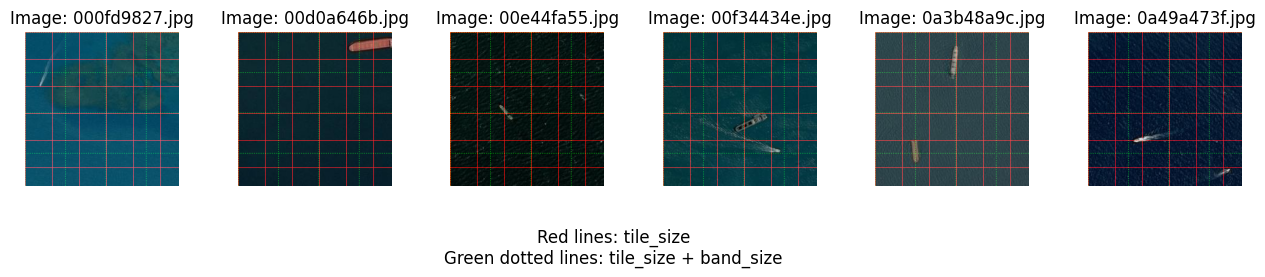

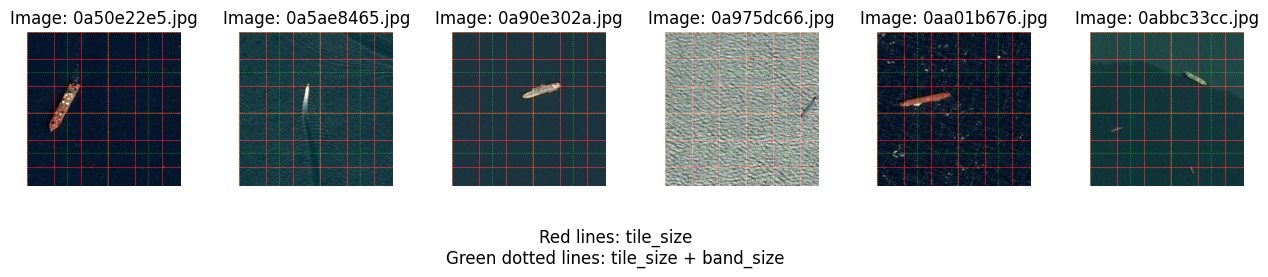

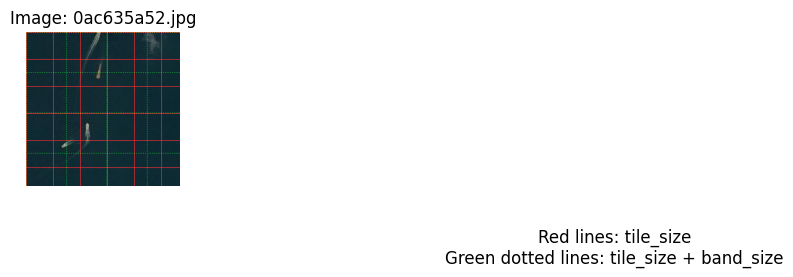

In [22]:
# Assuming images_dict_RGB contains images with keys and values in RGB format (NumPy arrays)
images_per_row = 6

# Calculate the number of rows required for the images
n_images = len(images_dict_RGB)
n_rows = math.ceil(n_images / images_per_row)

# Create a figure to display images with dynamic number of rows
for row in range(n_rows):
    plt.figure(figsize=(16, 2))  # Adjust figsize to fit all images

    for col in range(images_per_row):
        idx = row * images_per_row + col
        if idx >= n_images:  # Stop if there are no more images
            break

        filename_key, imageRGB = list(images_dict_RGB.items())[idx]

        # Apply grid lines
        image_with_grid = draw_grid(imageRGB, tile_size, tot_size)  

        # Display the image (RGB)
        plt.subplot(1, images_per_row, col + 1)
        plt.imshow(image_with_grid)
        plt.axis('off')  # Hide axes
        plt.title(f'Image: {filename_key}')

        # # Add annotation for gridlines
        # plt.text(0.5, -0.1, 'Red lines: tile_size\nGreen dotted lines: tile_size + band_size', 
        #          ha='center', va='top', transform=plt.gca().transAxes, fontsize=7, color='black')

    # Add annotation for gridlines at the bottom-center of the figure
    plt.figtext(0.5, -0.1, 'Red lines: tile_size\nGreen dotted lines: tile_size + band_size', 
                ha='center', va='top', fontsize=12, color='black')

    plt.show()  # Show images for the current row

In [23]:
def showRXperformanceT(groundtruth, RX_scores, label, title, ax):
    FP_rx, TP_rx, _ = roc_curve(groundtruth.flatten(), RX_scores.flatten())
    AUC_rx = auc(FP_rx, TP_rx)
    
    ax.plot(FP_rx, TP_rx, linewidth=2, label=label + f' AUC = {AUC_rx:.6f}')
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.grid()

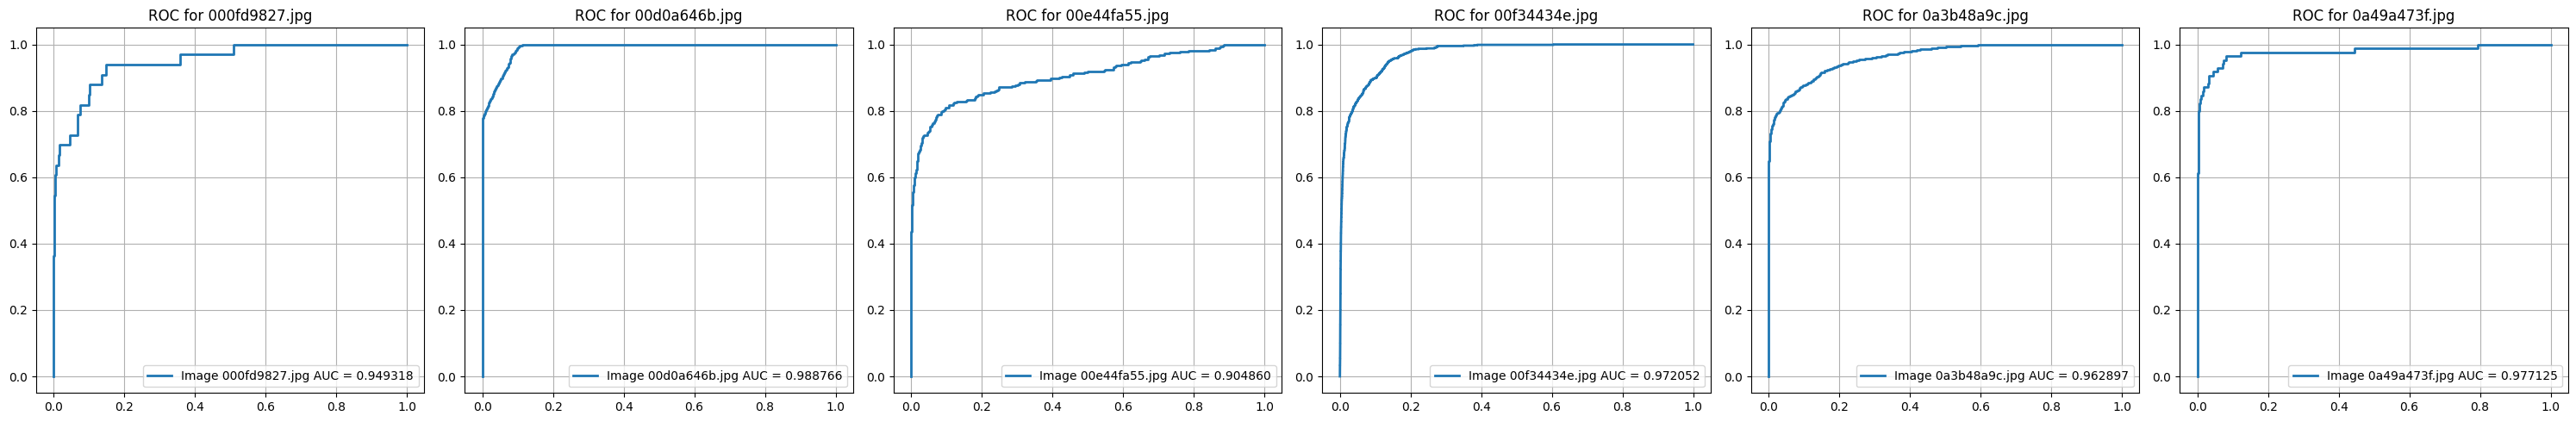

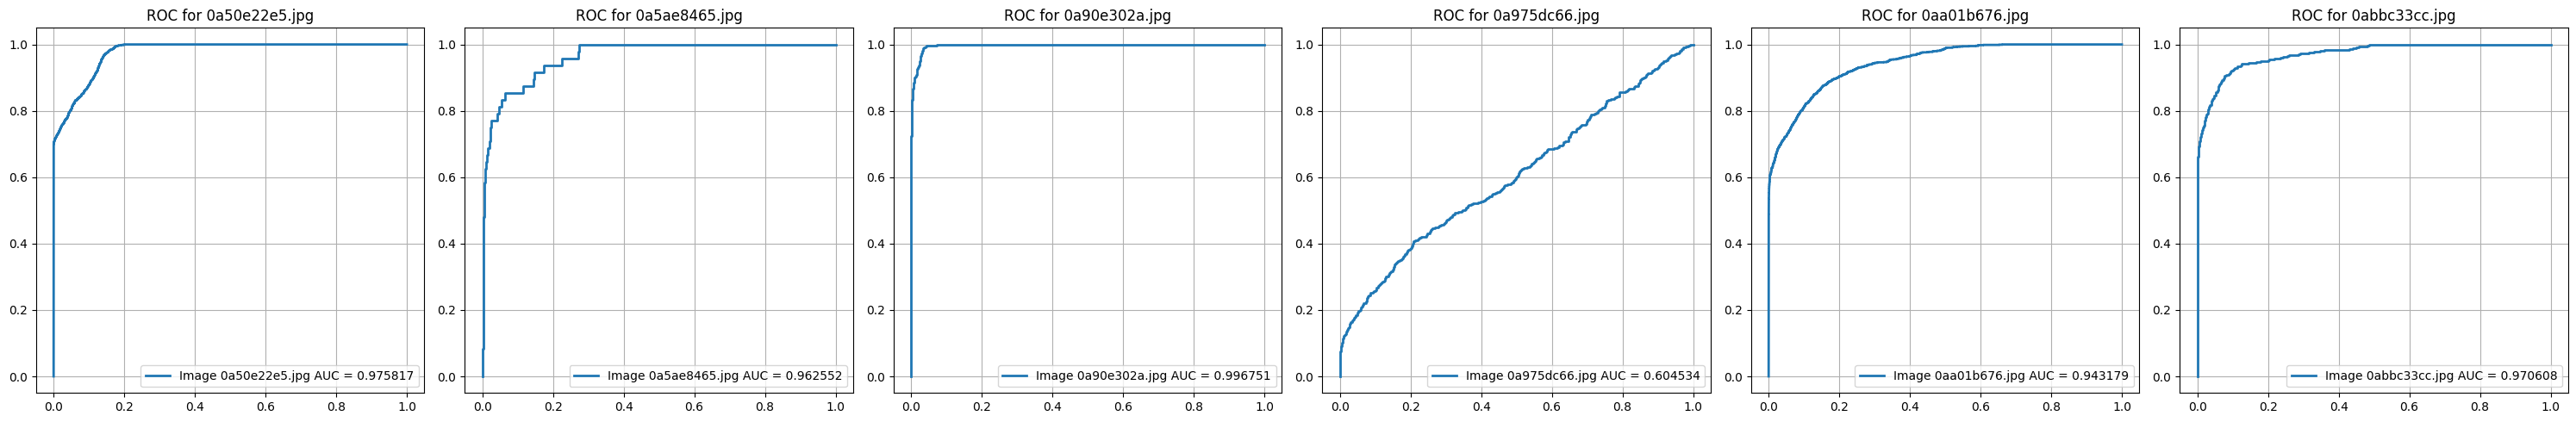

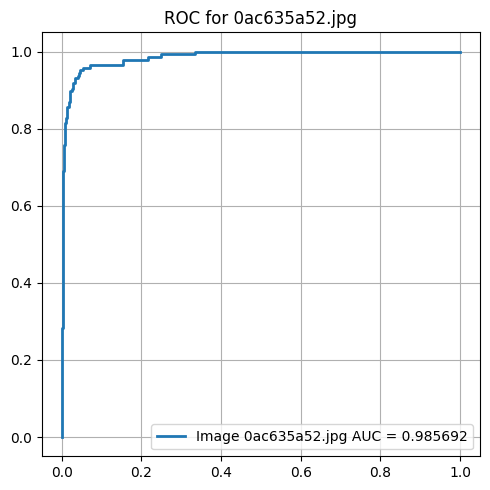

In [24]:
plots_per_row = 6
image_ids = list(results_dict.keys())  # Get the list of image IDs
GL_AUC = []

# Loop through images in chunks of 6
for i in range(0, len(image_ids), plots_per_row):
    batch_ids = image_ids[i:i+plots_per_row]  # Get a batch of 6 image IDs
    num_plots = len(batch_ids)  # Number of plots in the current row
    
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))  # Create subplots
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot case

    for ax, image_id in zip(axes, batch_ids):
        if image_id in groundtruth_dict and image_id in results_dict:
            RX_scores = results_dict[image_id]['weighted_LRX_scoresT']  # Extract LRX scores
            groundtruth = groundtruth_dict[image_id]  # Get ground truth mask
            
            FP_rx, TP_rx, _ = roc_curve(groundtruth.flatten(), RX_scores.flatten())
            AUC_rx = auc(FP_rx, TP_rx)
            GL_AUC.append(AUC_rx)
            
            ax.plot(FP_rx, TP_rx, linewidth=2, label=f"Image {image_id}" + f' AUC = {AUC_rx:.6f}')
            ax.legend(loc='lower right')
            ax.set_title(f"ROC for {image_id}")
            ax.grid()
            # showRXperformanceT(groundtruth, RX_scores, label=f"Image {image_id}", title=f"ROC for {image_id}", ax=ax)
        else:
            ax.set_title(f"Missing Data for {image_id}")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

default image

In [25]:
mappedImage = createMappedImage(image, D)

n_channels = image.shape[2]
tile_shape = (tile_size, tile_size, n_channels)

In [26]:
algorithm = TiledAlgorithm(tile_size, padding, border_type, band_size)
tiles, tile_centers, tile_means, tile_covariances, result_image = algorithm.process(image)
weighted_LRX_scores = compute_weighted(tile_means, tile_covariances, tile_centers, image)

In [27]:
def showRXscores(RX_scores):
    fig = plt.imshow(RX_scores, cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

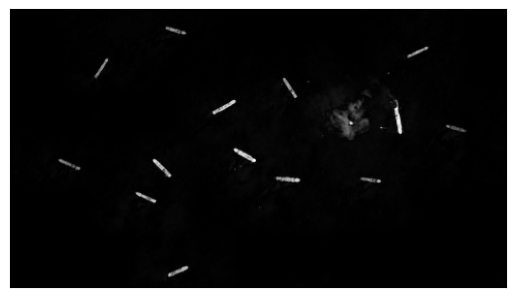

In [28]:
showRXscores(weighted_LRX_scores)

In [ ]:
def showRXresult(RX_scores, percentileValue=99):    
    threshold = np.percentile(RX_scores.flatten(), percentileValue) 
    fig = plt.imshow(RX_scores >= threshold, cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

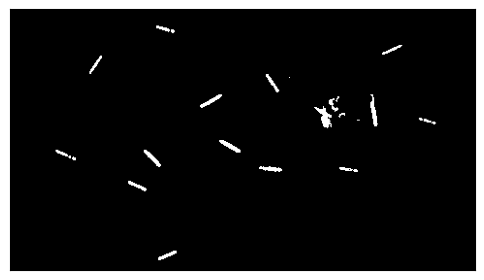

In [ ]:
showRXresult(weighted_LRX_scores)

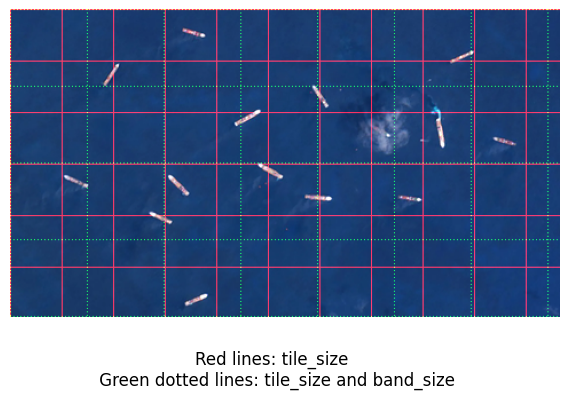

In [31]:
# Draw the grid (assuming you already have the draw_grid function defined)
image_with_gridD = draw_grid(imageRGBD, tile_size, tot_size)

# Create a figure with increased size
fig = plt.figure(figsize=(8, 4))  # Adjust the size as needed

# Display the image
plt.imshow(image_with_gridD)

# Hide the axes
plt.axis('off')

# Add the custom text with a higher y-position
plt.figtext(0.5, -0.02, f"Red lines: tile_size \n Green dotted lines: tile_size and band_size", ha="center", va="center", fontsize=12)

# Show the plot
plt.show()

In [32]:
def showRXperformance(groundtruth, RX_scores, label, title):
    
    if groundtruth.ndim == 3:
        groundtruth = groundtruth[:, :, 0]  # Take a single channel

    FP_rx, TP_rx, T_rx = roc_curve(groundtruth.flatten(), RX_scores.flatten())
    AUC_rx = auc(FP_rx, TP_rx)
    
    plt.figure(figsize=(8, 6))
    plt.plot(FP_rx, TP_rx, linewidth=2, label=label + ' AUC = ' + str(round(AUC_rx, 6)))
    plt.legend(loc='lower right')
    plt.title(title)
    plt.grid()
    plt.show()

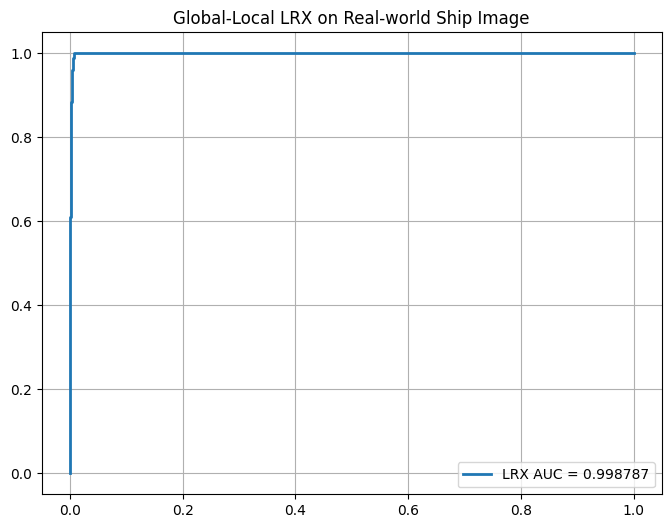

In [33]:
showRXperformance(groundtruthD, weighted_LRX_scores, 'LRX', 'Global-Local LRX on Real-world Ship Image')

## Local RX Detector Functions

In [34]:
def local_LRX_detector(image, window_size, guard_size, D, energyPercentile=99.99, lambda_=0, verbose=False):
    mappedImage = createMappedImage(image, D)
    
    parameters = tuple([energyPercentile])
    
    return slidingDetector(mappedImage, LRX_detector, window_size, guard_size, lambda_, parameters=parameters, verbose=verbose)

In [35]:
def createMappedImage(image, D, sigma=None):
    d = image.shape[-1]
    X = image.reshape(-1, d)
    
    if (sigma is None):
        sigma = estimateSigma(X)
    
    d = image.shape[-1]
    G = np.random.randn(D, D)
    Q, _ = np.linalg.qr(G)
    S = np.diag(np.sqrt(np.random.chisquare(1, size=D)))
    W = np.dot(S, Q)[:, :d] / sigma

    Z = X @ W.T
    mappedImage = Z.reshape(image.shape[0], image.shape[1], -1)
    
    return mappedImage

In [36]:
def createPaddedImage(image, window_size):
    window_radius = window_size // 2
    padded_image = np.pad(image, ((window_radius, window_radius), (window_radius, window_radius), (0, 0)), mode='edge')
    
    return padded_image

In [37]:
from numpy.lib.stride_tricks import sliding_window_view

In [38]:
def slidingDetector(image, detector, window_size, guard_size, lambda_=0, parameters=None, verbose=False):
    padded_image = createPaddedImage(image, window_size)

    n_channels = image.shape[2]
    window_shape = (window_size, window_size, n_channels)
    windows = sliding_window_view(padded_image, window_shape)
    
    height = windows.shape[0]
    width = windows.shape[1]
    RX_scores = np.zeros((height, width))
    
    for i in range(height):
        if (verbose and (i % 8) == 0):
            print('.', end='')

        for j in range(width):
            clutter = getClutter(windows, window_size, guard_size, i, j)
            center_pixel = image[i, j, :].reshape(-1, 1)
            
            RX_scores[i][j] = detector(clutter, center_pixel, lambda_, parameters)
    
    if (verbose):
        print()
            
    return RX_scores

In [39]:
def getClutter(windows, window_size, guard_size, i, j):
    window_radius = window_size // 2
    guard_radius = guard_size // 2
    clutter_radius = window_radius - guard_radius    
    window_area = window_size * window_size
    
    n_channels = windows.shape[-1]
    window = windows[i][j].reshape(window_area, n_channels)

    window2d = window.reshape(window_size, window_size, n_channels)
    r1 = window2d[:clutter_radius, :, :].reshape(-1, n_channels)
    r2 = window2d[clutter_radius:-clutter_radius, :clutter_radius, :].reshape(-1, n_channels)
    r3 = window2d[clutter_radius:-clutter_radius, -clutter_radius:, :].reshape(-1, n_channels)
    r4 = window2d[-clutter_radius:, :, :].reshape(-1, n_channels)
    clutter = np.concatenate((r1, r2, r3, r4), axis=0)

    return clutter

In [40]:
def LRX_detector(clutter, center_pixel, lambda_, parameters):
    mu = np.mean(clutter, axis=0)

    Xtrz = clutter - mu.reshape(-1, clutter.shape[1])

    clutter_area = Xtrz.shape[0]
    G = (1 / clutter_area) * np.dot(Xtrz.T, Xtrz)
    _, S, Vh = np.linalg.svd(G, full_matrices=False, hermitian=True)    
    
    energyPercentile = parameters[0]
    r = determineRank(S, energyPercentile)
    V = (Vh.T)[:, :r]
    S = S[:r]
    
    Si_lrx = (1.0 / S).reshape(1, -1)    

    z_star = center_pixel - mu.reshape(-1, center_pixel.shape[1])
    
    v_star = z_star.T @ V
    
    A_rx = computeRXresponse(v_star, Si_lrx)
    
    return A_rx

## Global RX Detector Functions

In [42]:
def getFourierFeatureBasis(D, d, sigma):    
    G = np.random.randn(D, D)
    Q, _ = np.linalg.qr(G)
    S = np.diag(np.sqrt(np.random.chisquare(1, size=D)))
    W = np.dot(S, Q)[:, :d] / sigma   

    return W

In [43]:
def mapToZ(X, W, D):
    z_star = np.hstack((np.sin(np.dot(X, W.T)), np.cos(np.dot(X, W.T)))) / np.sqrt(D)
    
    return z_star

In [44]:
def determineRank(S, energyPercentile=99.99):
    d = S.shape[0]

    percentile = energyPercentile / 100.0
    logS = np.log(S + 1.0)
    cdf = np.cumsum(logS) / np.sum(logS)
    r = np.min(np.where(np.logical_and(cdf > percentile, logS > 1e-10))) + 1
    r = max(min(r, d), 1)

    return r

In [45]:
from sklearn.utils.extmath import randomized_svd

In [46]:
def computeRXresponse(X, Ci):
    if (Ci.shape[0] == 1):
        if (X.shape[1] == 1):
            response = (X.T * (Ci * X))
        else:
            response = np.sum(np.multiply(X, Ci) * X, axis=1)
    else:
        if (X.shape[1] == 1):
            response = (X.T @ (Ci @ X))
        else:
            response = np.sum((X @ Ci) * X, axis=1)
    
    if (len(response) == 1):
        return response.item()
    else:
        return response

In [47]:
def train_LRX(Xtr, D, sigma, r=None, energyPercentile=None, randomizedSVDthreshold=256):
    n = Xtr.shape[0]
    d = Xtr.shape[1]
    
    W = getFourierFeatureBasis(D, d, sigma)

    Z_star = mapToZ(Xtr, W, D)
    
    mu = np.mean(Z_star, axis=0)
    Z_star = Z_star - mu.reshape(-1, Z_star.shape[1])
    
    G = (1 / n) * np.dot(Z_star.T, Z_star)
    if (D < randomizedSVDthreshold):
        _, S, Vh = np.linalg.svd(G, full_matrices=False, hermitian=True)
    else:
        _, S, Vh = randomized_svd(G, n_components=D)
    
    if (r is None):
        if (energyPercentile is None):
            energyPercentile = 99.0
        r = determineRank(S, energyPercentile)
    
    V = (Vh.T)[:, :r]
    S = S[:r]
    
    Si_lrx = (1.0 / S).reshape(1, -1)
    
    return mu, W, V, Si_lrx

In [48]:
def inference_LRX(Xts, mu, W, V, Si_lrx):
    Z_star = mapToZ(Xts, W, D) - mu[np.newaxis, :]
    
    V_star = np.dot(Z_star, V)
    
    A_lrx = computeRXresponse(V_star, Si_lrx)
    
    return A_lrx

In [49]:
def global_LRX_detector(Xtr, Xts, D, r=None, energyPercentile=None, sigma=None):
    if (sigma is None):
        sigma = estimateSigma(Xtr)
    
    mu, W, V, Si_lrx = train_LRX(Xtr, D, sigma, r, energyPercentile)
    
    A_lrx = inference_LRX(Xts, mu, W, V, Si_lrx)
    
    return A_lrx, Si_lrx

## Main Code of Global and Local RX detector

In [ ]:
window_size = 45
guard_size = 35
lambda_ = 1e-16
D15 = 8
energyPercentile = 99.99

In [50]:
seedValue = 1234
np.random.seed(seedValue)
D10 = 16

In [51]:
local_LRX_scores = []
local_times = []
local_AUC = []
global_LRX_scores = []
global_times = []
global_AUC = []

for img_idT, imageT in images_dict_norm.items():

    groundtruthY = groundtruth_dict[img_idT]
    start_time = time.time()
    Local_scores = local_LRX_detector(imageT, window_size, guard_size, D15, energyPercentile, lambda_, verbose=True)
    total_time = time.time() - start_time
    local_LRX_scores.append(Local_scores)
    local_times.append(total_time)
    FP_rxL, TP_rxL, T_rxL = roc_curve(groundtruthY.flatten(), Local_scores.flatten())
    AUC_rxL = auc(FP_rxL, TP_rxL)
    local_AUC.append(AUC_rxL)
    print("local Done for", img_idT)

    d = imageT.shape[-1]
    X = imageT.reshape(-1, d)
    start_timeG = time.time()
    A_lrx, Si_lrx = global_LRX_detector(X, X, D10)
    total_timeG = time.time() - start_timeG
    global_scores = A_lrx.reshape(imageT.shape[0], imageT.shape[1])
    global_LRX_scores.append(global_scores)
    global_times.append(total_timeG)
    FP_rxG, TP_rxG, T_rxG = roc_curve(groundtruthY.flatten(), global_scores.flatten())
    AUC_rxG = auc(FP_rxG, TP_rxG)
    global_AUC.append(AUC_rxG)
    print("global Done for", img_idT)

................................
local Done for 000fd9827.jpg
global Done for 000fd9827.jpg
................................
local Done for 00d0a646b.jpg
global Done for 00d0a646b.jpg
................................
local Done for 00e44fa55.jpg
global Done for 00e44fa55.jpg
................................
local Done for 00f34434e.jpg
global Done for 00f34434e.jpg
................................
local Done for 0a3b48a9c.jpg
global Done for 0a3b48a9c.jpg
................................
local Done for 0a49a473f.jpg
global Done for 0a49a473f.jpg
................................
local Done for 0a50e22e5.jpg
global Done for 0a50e22e5.jpg
................................
local Done for 0a5ae8465.jpg
global Done for 0a5ae8465.jpg
................................
local Done for 0a90e302a.jpg
global Done for 0a90e302a.jpg
................................
local Done for 0a975dc66.jpg
global Done for 0a975dc66.jpg
................................
local Done for 0aa01b676.jpg
global Done for 0a

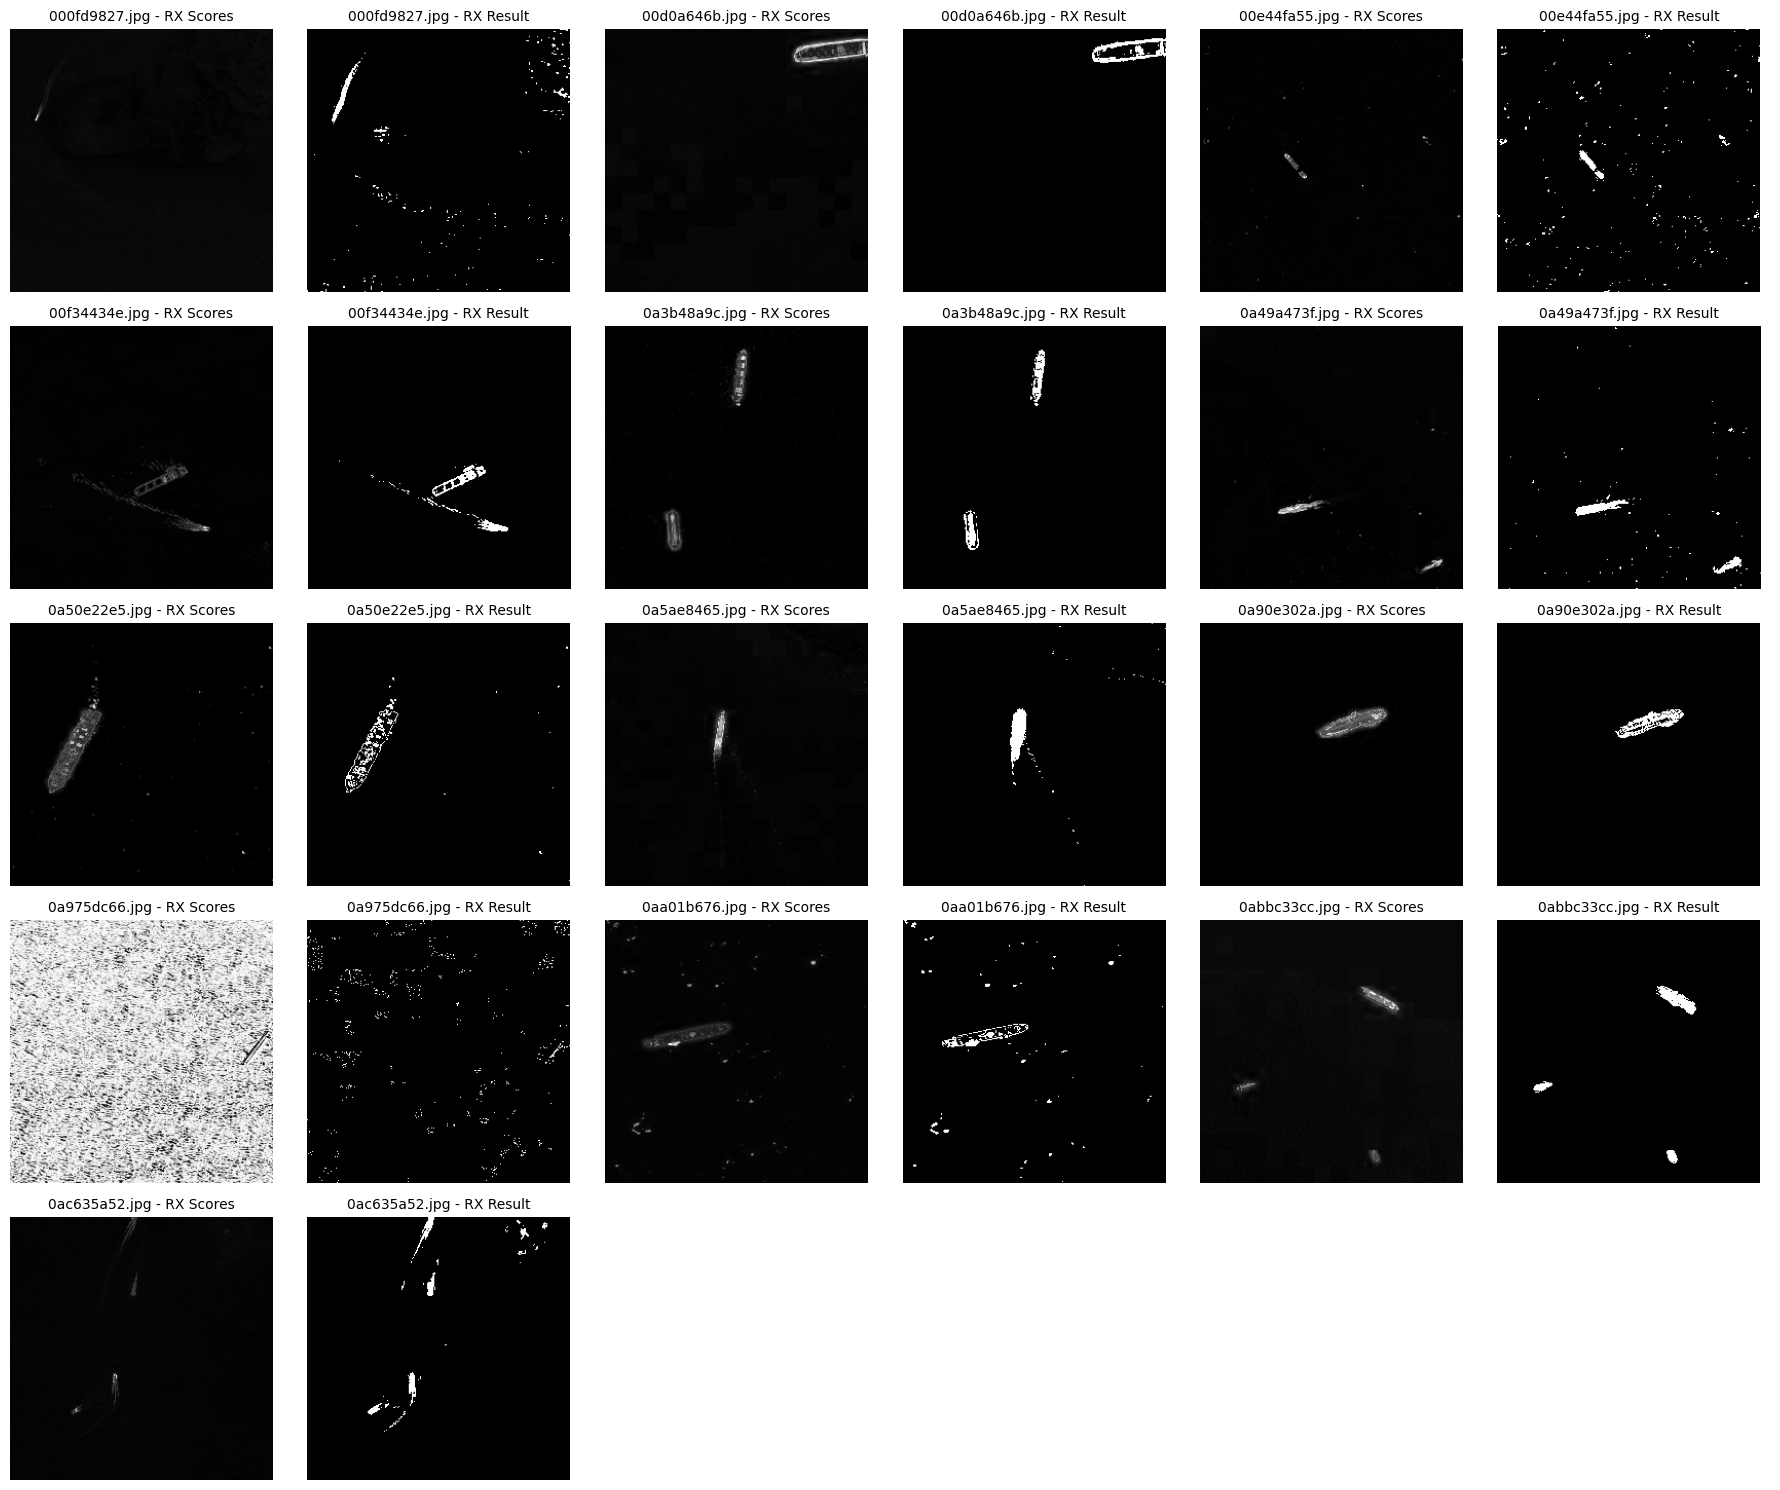

In [52]:
# Define how many columns we want in the figure
cols = 6  # 6 images per row
num_items = len(results_dict)
rows = (num_items * 2 + cols - 1) // cols  # Compute required rows

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

# Flatten the axes array for easier indexing
axes = axes.flatten()

idx = 0
for item1, item2 in zip(global_LRX_scores, list(results_dict.keys())):
    if idx >= len(axes) - 1:  # Prevent out of bounds
        break
    showRXscoresT(axes[idx], item1, f"{item2} - RX Scores")
    idx += 1
    showRXresultT(axes[idx], item1, f"{item2} - RX Result")
    idx += 1

# Hide any unused subplots
for i in range(idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

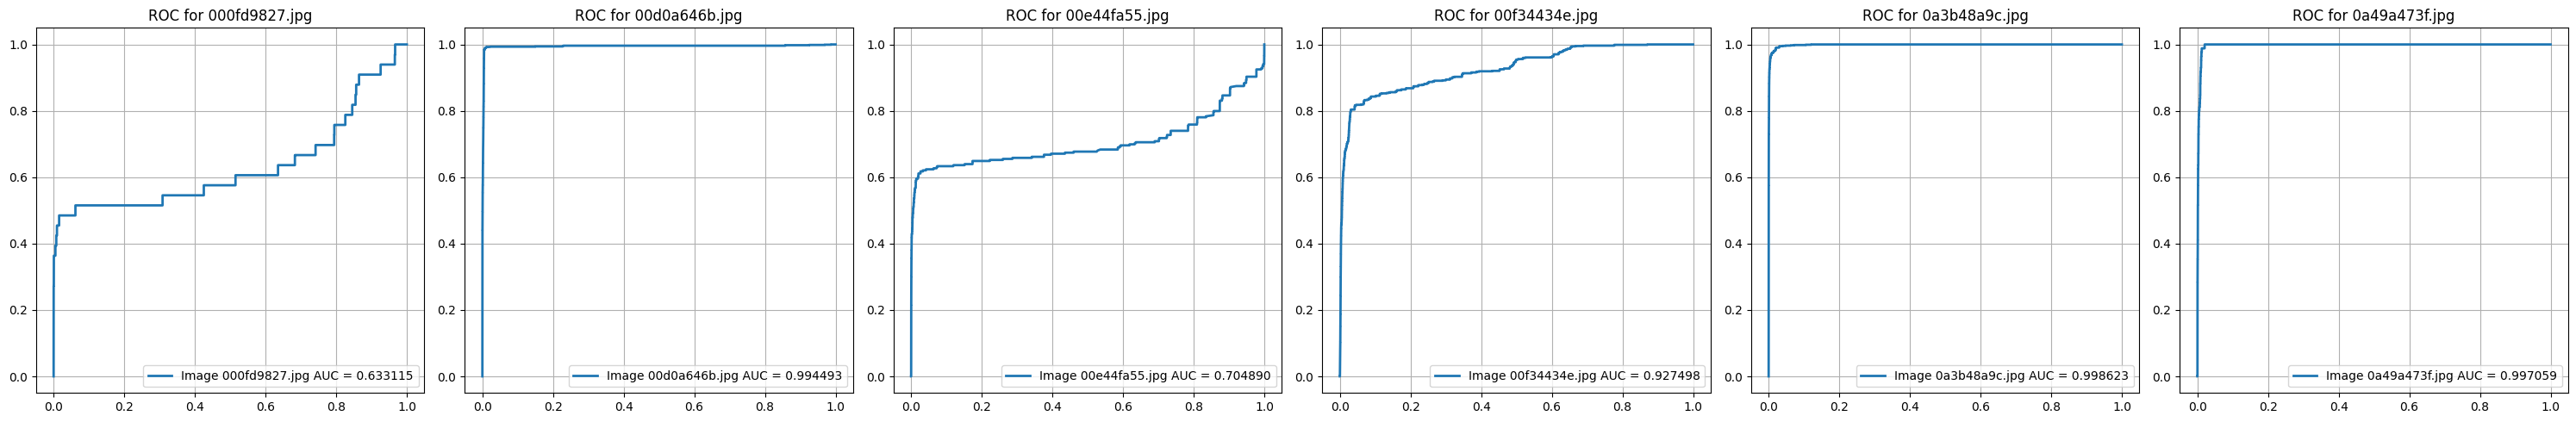

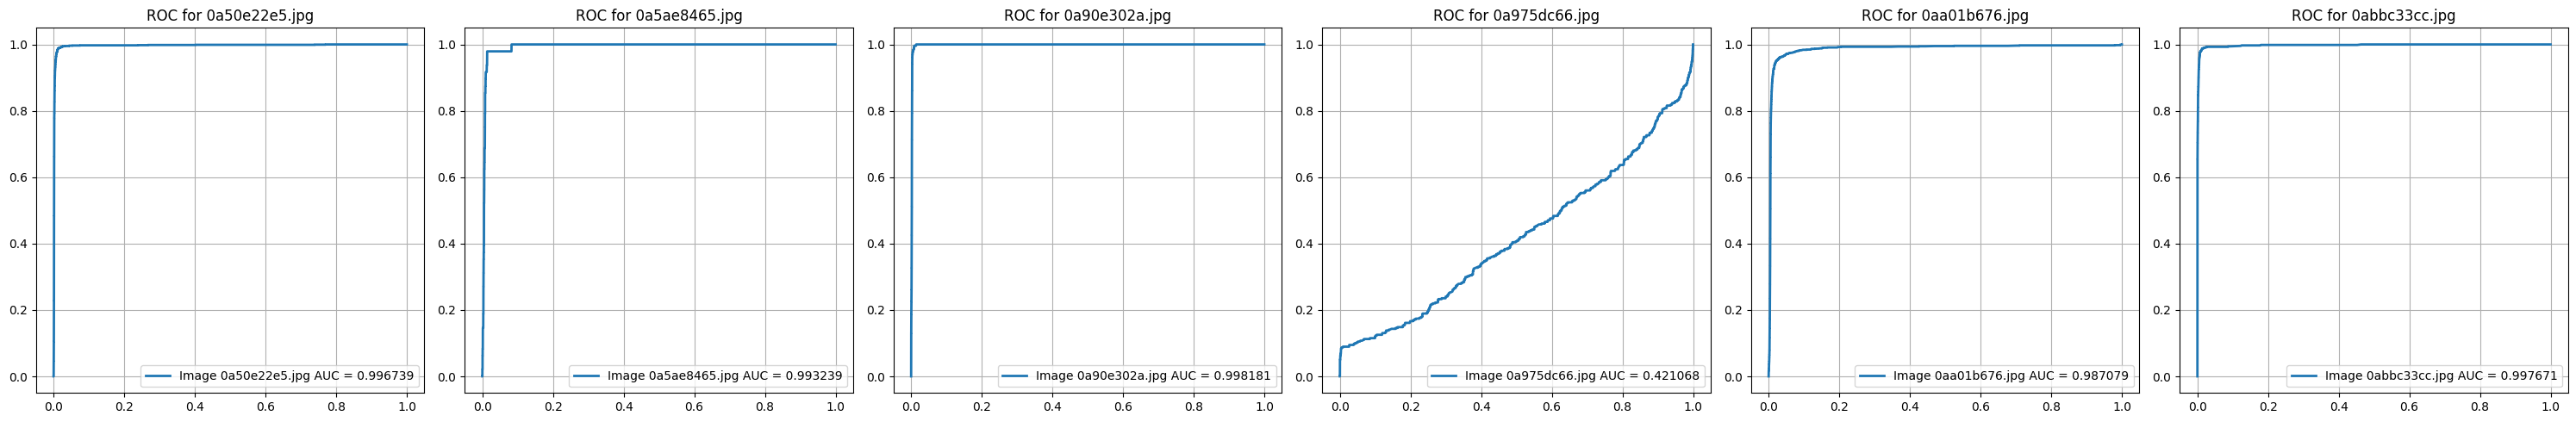

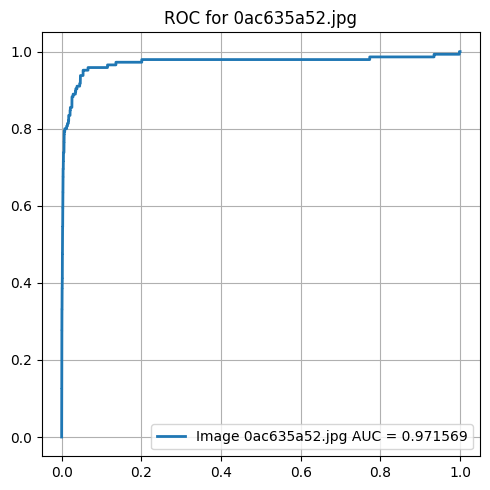

In [53]:
plots_per_row = 6
image_ids = list(results_dict.keys())  # Get the list of image IDs

# Loop through images in chunks of 6
for i in range(0, len(image_ids), plots_per_row):
    batch_ids = image_ids[i:i+plots_per_row]  # Get a batch of 6 image IDs
    num_plots = len(batch_ids)  # Number of plots in the current row
    
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))  # Create subplots
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot case

    for ax, image_id in zip(axes, batch_ids):
        if image_id in groundtruth_dict and image_id in results_dict:
            image_idx = image_ids.index(image_id)
            # Access RX_scores from the global_LRX_scores list using the image_idx
            RX_scores = global_LRX_scores[image_idx]  # Correctly access the RX scores
            groundtruth = groundtruth_dict[image_id]  # Get ground truth mask
            
            showRXperformanceT(groundtruth, RX_scores, label=f"Image {image_id}", title=f"ROC for {image_id}", ax=ax)
        else:
            ax.set_title(f"Missing Data for {image_id}")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
# Define how many columns we want in the figure
cols = 6  # 6 images per row
num_items = len(results_dict)
rows = (num_items * 2 + cols - 1) // cols  # Compute required rows

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

# Flatten the axes array for easier indexing
axes = axes.flatten()

idx = 0
for item1, item2 in zip(local_LRX_scores, list(results_dict.keys())):
    if idx >= len(axes) - 1:  # Prevent out of bounds
        break
    showRXscoresT(axes[idx], item1, f"{item2} - RX Scores")
    idx += 1
    showRXresultT(axes[idx], item1, f"{item2} - RX Result")
    idx += 1

# Hide any unused subplots
for i in range(idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
plots_per_row = 6
image_ids = list(results_dict.keys())  # Get the list of image IDs

# Loop through images in chunks of 6
for i in range(0, len(image_ids), plots_per_row):
    batch_ids = image_ids[i:i+plots_per_row]  # Get a batch of 6 image IDs
    num_plots = len(batch_ids)  # Number of plots in the current row
    
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))  # Create subplots
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot case

    for ax, image_id in zip(axes, batch_ids):
        if image_id in groundtruth_dict and image_id in results_dict:
            image_idx = image_ids.index(image_id)
            # Access RX_scores from the global_LRX_scores list using the image_idx
            RX_scores = local_LRX_scores[image_idx]  # Correctly access the RX scores
            groundtruth = groundtruth_dict[image_id]  # Get ground truth mask
            
            showRXperformanceT(groundtruth, RX_scores, label=f"Image {image_id}", title=f"ROC for {image_id}", ax=ax)
        else:
            ax.set_title(f"Missing Data for {image_id}")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

In [54]:
results = {
    "Image": list(results_dict.keys()),
    "Local RX Time (s)": local_times,
    "Global RX Time (s)": global_times,
    "Global-Local RX Time (s)": GL_times,
    "Local RX AUC": local_AUC,
    "Global RX AUC": global_AUC,
    "Global-Local RX AUC": GL_AUC
}

In [55]:
import pandas as pd

df = pd.DataFrame(results)
df["Average Time (s)"] = df[["Local RX Time (s)", "Global RX Time (s)", "Global-Local RX Time (s)"]].mean(axis=1)
df["Average AUC"] = df[["Local RX AUC", "Global RX AUC", "Global-Local RX AUC"]].mean(axis=1)

print(df)

            Image  Local RX Time (s)  Global RX Time (s)  \
0   000fd9827.jpg          38.669235            0.249344   
1   00d0a646b.jpg          34.984003            0.087139   
2   00e44fa55.jpg          22.497175            0.226822   
3   00f34434e.jpg          22.315537            0.285743   
4   0a3b48a9c.jpg          27.634399            0.243875   
5   0a49a473f.jpg          23.485601            0.130408   
6   0a50e22e5.jpg          35.744328            0.273443   
7   0a5ae8465.jpg          23.863575            0.091553   
8   0a90e302a.jpg          25.259415            0.116228   
9   0a975dc66.jpg          30.585630            0.172743   
10  0aa01b676.jpg          21.510676            0.187443   
11  0abbc33cc.jpg          21.918436            0.090080   
12  0ac635a52.jpg          20.006276            0.093997   

    Global-Local RX Time (s)  Local RX AUC  Global RX AUC  \
0                   0.382772      0.997191       0.633115   
1                   0.320729      0.9